# Quantum LSTM For Timeseries Forecasting _(Capstone Project)_

                                                                                                   Hasnain Sikora, 19BAI1072

# _Introduction_

Quantum LSTMs (QLSTMs) are a recent development
that aims to leverage the properties of quantum mechanics
to improve the performance of traditional LSTMs. While
traditional LSTMs use classical bits to store information,
QLSTMs use quantum bits, or qubits, which can exist
in a superposition of states and be entangled with each
other. This allows QLSTMs to potentially perform certain
computations much faster than traditional LSTMs.
One of the main advantages of QLSTMs is their ability
to perform certain computations exponentially faster than
traditional LSTMs. This is because qubits can exist in a
superposition of states and be entangled with each other,
allowing them to perform certain calculations in parallel.

This can be particularly useful for tasks that involve
searching through large datasets, such as image or speech
recognition. Another potential advantage of QLSTMs is
their ability to handle high-dimensional data. Traditional
LSTMs are limited by the curse of dimensionality, which
means that they can become less accurate as the number of
input features increases. QLSTMs, on the other hand, can
potentially handle high-dimensional data more effectively
by using quantum algorithms such as quantum principal
component analysis (PCA). QLSTMs also have the ability to
perform certain types of computations that are not possible
with traditional LSTMs, such as quantum machine learning
and quantum optimization. These tasks are important for
many real-world applications, such as drug discovery and
quantum cryptography.

It’s worth noting that the research in this field is ongoing
and still in its early stages, and it’s not yet clear whether QL-
STMs will be able to deliver on their potential benefits. Also,
developing and implementing QLSTMs require significant
technical expertise and specialized hardware, which can be a
barrier to their widespread adoption. In summary, QLSTMs
are a promising new development in the field of machine
learning that aims to leverage the properties of quantum me-
chanics to improve the performance of traditional LSTMs.
Potential advantages include the ability to perform certain
computations exponentially faster, handle high-dimensional
data more effectively and perform certain types of computa-
tions that are not possible with traditional LSTMs. However,
more research is needed to fully understand their capabilities
and limitations, and the implementation is still challenging.

In [1]:
import plotly.io as pio
pio.renderers.default='notebook'

# _Data Exploration_

The 30-year normals (daily) on https://saskatoon.weatherstats.ca refer to a set of climatological data collected over a 30-year period. These data represent the typical weather conditions for a given location, and they are used to provide a baseline for comparison with current or future weather conditions.

The data are collected from the Environment and Climate Change Canada climate station located in Saskatoon, Saskatchewan, Canada. The period covered by the 30-year normals is 1981-2010. The data are updated every 10 years to account for changes in the climate over time.

The 30-year normals include a variety of weather parameters that are measured on a daily basis. Some of these parameters include:

- Temperature (in degrees Celsius): The temperature is a key weather variable that has a significant impact on the climate in Saskatoon. It is an important feature that affects the other weather variables as well. For example, higher temperatures can result in increased evaporation rates, which can in turn affect the relative humidity.

- Dew point (in degrees Celsius): The dew point is the temperature to which the air must be cooled for water vapor to condense into water droplets. This variable is important because it can affect the comfort level of individuals. Higher dew points can lead to higher levels of discomfort, especially in humid conditions.

- Relative humidity (in percentage): The relative humidity is the amount of water vapor present in the air compared to the maximum amount that the air could hold at that temperature. This variable is important because it can affect the overall comfort level of individuals. Higher relative humidity can lead to a feeling of stickiness and discomfort.

- Wind speed (in kilometers per hour): The wind speed is the speed at which the air is moving in a particular direction. This variable is important because it can affect the temperature and comfort level of individuals. Higher wind speeds can lead to lower temperatures and can make individuals feel colder.

- Pressure (in kilopascals): The atmospheric pressure is the force per unit area exerted by the weight of the atmosphere. This variable is important because it can affect the weather conditions in a particular region. For example, lower pressure systems can bring in moisture and result in cloudy conditions, while higher pressure systems can result in clear skies and sunny conditions.

This set of data would provide a good beginning point to explore and divide our data in a way that could do justice to the training capabilities of both LSTM and our QLSTM.

In [45]:
#importing all the necessary pip packages to proceed
import pandas as pd
# from utils import *
import time
import numpy as np
import math
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torch import nn
from IPython.display import Image
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import torch
from torch import nn
from torch.utils.data import Dataset
# import pennylane as qml
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [46]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
cd "/content/gdrive/MyDrive/Saskatoon QLSTM/Code"

/content/gdrive/MyDrive/Saskatoon QLSTM/Code


In [48]:
ls

 daily.csv
 __pycache__/
 qlstm.pth
 saskatoon_daily.csv
'Saskatoon_QLSTM 4-Qubit system - 15 epochs.ipynb'
'Saskatoon_QLSTM Hyperparameter selection.ipynb'
'Saskatoon_QLSTM Logged.ipynb'
'Saskatoon_QLSTM run for 20 epochs.ipynb'
'Saskatoon_QLSTM Subdivided into 4,6,8 - qubit system.ipynb'


In [49]:
# read the data frame
df = pd.read_csv('daily.csv')
df.head()

<ipython-input-49-a96d9a46da68>:2: DtypeWarning:

Columns (46,47) have mixed types. Specify dtype option on import or set low_memory=False.



,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
0,2023-02-21,-21.9,-25.90,-26.60,-31.3,NaN,-42.0,78.0,74.9,73.5,...,NaN,NaN,6.0,2.8,3.0,0.0,NaN,NaN,NaN,NaN
1,2023-02-20,-14.8,-19.78,-20.39,-26.0,NaN,-38.0,86.0,77.8,79.0,...,NaN,NaN,8.0,5.0,4.5,1.0,NaN,NaN,NaN,NaN
2,2023-02-19,-11.4,-13.15,-13.15,-14.9,NaN,-24.0,86.0,78.7,78.0,...,NaN,NaN,8.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN
3,2023-02-18,-7.0,-10.82,-10.30,-13.6,NaN,-20.0,88.0,79.4,80.0,...,NaN,NaN,8.0,7.2,5.5,3.0,NaN,NaN,NaN,NaN
4,2023-02-17,-3.2,-6.41,-7.60,-12.0,NaN,-20.0,89.0,80.9,79.5,...,NaN,NaN,8.0,6.1,4.5,1.0,NaN,NaN,NaN,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11010 entries, 0 to 11009
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           11010 non-null  object 
 1   max_temperature                11010 non-null  float64
 2   avg_hourly_temperature         11010 non-null  float64
 3   avg_temperature                11010 non-null  float64
 4   min_temperature                11010 non-null  float64
 5   max_humidex                    1865 non-null   float64
 6   min_windchill                  6062 non-null   float64
 7   max_relative_humidity          11008 non-null  float64
 8   avg_hourly_relative_humidity   11008 non-null  float64
 9   avg_relative_humidity          11008 non-null  float64
 10  min_relative_humidity          11008 non-null  float64
 11  max_dew_point                  11008 non-null  float64
 12  avg_hourly_dew_point           11008 non-null 

# _Plotting Features_

In [51]:
# plot all the features of the past year to avoid cluttered view of the dataset
past_year=df[(df['date'] > '2022-01-01')]

#temperatures over the last year
temp_plot = go.Figure()
temp_plot.add_scatter(x=past_year['date'], y=past_year['max_temperature'],name="Maximum Temperature",

                      line = dict( width=2, dash='dot', color="#EB455F")
                     )
temp_plot.add_scatter(x=past_year['date'], y=past_year['min_temperature'], name= "Minimum Temperature",  line = dict( color="#2B3467",width=2, dash='dash'))
temp_plot.add_scatter(x=past_year['date'], y=past_year['avg_temperature'], name="Average Temperature",line=dict(color="#FFB84C"))
temp_plot.update_layout(title='Temperature In Saskatoon',xaxis_title='Months',yaxis_title='Temperature (degrees C)')
temp_plot.show()

#dew point over the last year
dew_plot = go.Figure()
dew_plot.add_scatter(x=past_year['date'], y=past_year['max_dew_point'],name="Maximum Dew Point",line = dict( color="#EB455F",width=2, dash='dot'))
dew_plot.add_scatter(x=past_year['date'], y=past_year['min_dew_point'], name= "Minimum Dew Point",line = dict( color="#2B3467",width=2, dash='dash'))
dew_plot.add_scatter(x=past_year['date'], y=past_year['avg_dew_point'],line = dict( color="#FFB84C"), name="Average Dew Point")
dew_plot.update_layout(title='Dew Point In Saskatoon',xaxis_title='Months',yaxis_title='Dew Point (degrees C)')
dew_plot.show()

#humidity over the last year
humidity_plot = go.Figure()
humidity_plot.add_scatter(x=past_year['date'], y=past_year['max_relative_humidity'],name="Maximum Relative Humidity",line = dict( color="#EB455F",width=2, dash='dot'))
humidity_plot.add_scatter(x=past_year['date'], y=past_year['min_relative_humidity'], name= "Minimum Relative Humidityy",line = dict( color="#2B3467",width=2, dash='dash'))
humidity_plot.add_scatter(x=past_year['date'], y=past_year['avg_relative_humidity'],line = dict( color="#FFB84C"), name="Average Relative Humidity")
humidity_plot.update_layout(title='Relative Humidity In Saskatoon',xaxis_title='Months',yaxis_title='Percentage (%)')
humidity_plot.show()


#pressure over the last year
pressure_plot = go.Figure()
pressure_plot.add_scatter(x=past_year['date'], y=past_year['max_pressure_station'],name="Maximum Pressure Station",line = dict( color="#EB455F",width=2, dash='dot'))
pressure_plot.add_scatter(x=past_year['date'], y=past_year['min_pressure_station'], name= "Minimum Pressure Station",line = dict( color="#2B3467",width=2, dash='dash'))
pressure_plot.add_scatter(x=past_year['date'], y=past_year['avg_pressure_station'], name="Average Pressure Station",line = dict( color="#FFB84C"))
pressure_plot.update_layout(title='Pressure In Saskatoon',xaxis_title='Months', yaxis_title='Pressure (kPa)')
pressure_plot.show()


#wind speed over the last year
wind_plot = go.Figure()
wind_plot.add_scatter(x=past_year['date'], y=past_year['max_wind_speed'],name="Maximum Wind Speed",line = dict( color="#EB455F",width=2, dash='dot'))
wind_plot.add_scatter(x=past_year['date'], y=past_year['min_wind_speed'], name= "Minimum Wind Speed",line = dict( color="#2B3467",width=2, dash='dash'))
wind_plot.add_scatter(x=past_year['date'], y=past_year['avg_wind_speed'],name="Average Wind Speed",line = dict( color="#FFB84C"))
wind_plot.update_layout(title='Temperature In Saskatoon',xaxis_title='Months',yaxis_title='Speed (Kmph)')
wind_plot.show()

In [52]:
corr_matrix = df.corr()
corr_matrix

<ipython-input-52-208d05607fc1>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
max_temperature,1.000000,0.987962,0.987981,0.945797,0.792441,0.908945,0.179049,-0.445302,-0.470892,-0.661309,...,NaN,NaN,-0.098684,-0.123009,-0.131225,-0.112020,NaN,NaN,NaN,NaN
avg_hourly_temperature,0.987962,1.000000,0.997588,0.979583,0.852000,0.967972,0.217471,-0.379406,-0.399335,-0.591350,...,NaN,NaN,-0.050341,-0.036656,-0.048300,-0.032111,NaN,NaN,NaN,NaN
avg_temperature,0.987981,0.997588,1.000000,0.984629,0.860112,0.971363,0.219946,-0.369882,-0.395765,-0.588119,...,NaN,NaN,-0.049728,-0.033400,-0.041831,-0.023823,NaN,NaN,NaN,NaN
min_temperature,0.945797,0.979583,0.984629,1.000000,0.585084,0.986208,0.259782,-0.273969,-0.299433,-0.488409,...,NaN,NaN,0.007761,0.070132,0.061705,0.077815,NaN,NaN,NaN,NaN
max_humidex,0.792441,0.852000,0.860112,0.585084,1.000000,NaN,-0.095959,-0.085455,-0.100964,-0.083537,...,NaN,NaN,-0.098161,-0.143091,-0.109525,-0.080085,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min_cloud_cover_8,-0.112020,-0.032111,-0.023823,0.077815,-0.080085,0.156253,0.168364,0.345577,0.371314,0.371371,...,NaN,NaN,0.292145,0.722228,0.886185,1.000000,NaN,NaN,NaN,NaN
max_cloud_cover_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_hourly_cloud_cover_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_cloud_cover_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
import plotly.graph_objs as go

trace = go.Heatmap(z=corr_matrix.values,
                   x=corr_matrix.index.values,
                   y=corr_matrix.columns.values)
layout = go.Layout(title='Feature Correlation Matrix')
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [54]:
new_df = df.drop(['date'], axis=1)
new_df = df[['max_temperature','avg_temperature','min_temperature','max_dew_point','avg_dew_point','min_dew_point','max_relative_humidity','avg_relative_humidity','min_relative_humidity','max_wind_speed',
         'avg_wind_speed','min_wind_speed','max_pressure_station','avg_pressure_station','min_pressure_station']]
corr_matrix = new_df.corr()
corr_matrix

,max_temperature,avg_temperature,min_temperature,max_dew_point,avg_dew_point,min_dew_point,max_relative_humidity,avg_relative_humidity,min_relative_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,max_pressure_station,avg_pressure_station,min_pressure_station
max_temperature,1.000000,0.987981,0.945797,0.944068,0.940571,0.922748,0.179049,-0.470892,-0.661309,0.142144,0.080845,-0.069831,-0.363358,-0.287515,-0.192472
avg_temperature,0.987981,1.000000,0.984629,0.964486,0.972003,0.963392,0.219946,-0.395765,-0.588119,0.154075,0.099932,-0.043217,-0.394543,-0.313452,-0.211307
min_temperature,0.945797,0.984629,1.000000,0.959621,0.979367,0.981415,0.259782,-0.299433,-0.488409,0.163092,0.118603,-0.011896,-0.418378,-0.333694,-0.226472
max_dew_point,0.944068,0.964486,0.959621,1.000000,0.990532,0.966652,0.397076,-0.190364,-0.418404,0.152023,0.090939,-0.062884,-0.427153,-0.362039,-0.270157
avg_dew_point,0.940571,0.972003,0.979367,0.990532,1.000000,0.992649,0.392786,-0.183843,-0.408405,0.127606,0.073922,-0.059149,-0.427779,-0.350385,-0.248334
min_dew_point,0.922748,0.963392,0.981415,0.966652,0.992649,1.000000,0.382882,-0.175234,-0.393229,0.104110,0.057805,-0.054875,-0.421721,-0.334721,-0.225302
max_relative_humidity,0.179049,0.219946,0.259782,0.397076,0.392786,0.382882,1.000000,0.633136,0.311909,-0.124232,-0.172297,-0.207297,-0.205912,-0.181447,-0.142881
avg_relative_humidity,-0.470892,-0.395765,-0.299433,-0.190364,-0.183843,-0.175234,0.633136,1.000000,0.932906,-0.151929,-0.129839,-0.040002,-0.058990,-0.095237,-0.119884
min_relative_humidity,-0.661309,-0.588119,-0.488409,-0.418404,-0.408405,-0.393229,0.311909,0.932906,1.000000,-0.128690,-0.079212,0.047343,0.023538,-0.032365,-0.080598
max_wind_speed,0.142144,0.154075,0.163092,0.152023,0.127606,0.104110,-0.124232,-0.151929,-0.128690,1.000000,0.944766,0.501382,-0.179922,-0.290516,-0.365613


In [55]:
import plotly.graph_objs as go

trace = go.Heatmap(z=corr_matrix.values,
                   x=corr_matrix.index.values,
                   y=corr_matrix.columns.values)
layout = go.Layout(title='Shrunken Feature Correlation Matrix')
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [56]:
df = pd.read_csv('daily.csv')
df = df.drop(['date'], axis=1)
df = df[['max_temperature','avg_temperature','min_temperature','max_dew_point','avg_dew_point','min_dew_point','max_relative_humidity','avg_relative_humidity','min_relative_humidity','max_wind_speed',
         'avg_wind_speed','min_wind_speed','max_pressure_station','avg_pressure_station','min_pressure_station']]
df

<ipython-input-56-4a82263e2c1f>:1: DtypeWarning:

Columns (46,47) have mixed types. Specify dtype option on import or set low_memory=False.



,max_temperature,avg_temperature,min_temperature,max_dew_point,avg_dew_point,min_dew_point,max_relative_humidity,avg_relative_humidity,min_relative_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,max_pressure_station,avg_pressure_station,min_pressure_station
0,-21.9,-26.60,-31.3,-25.0,-29.8,-34.5,78.0,73.5,69.0,29,17.0,5,96.38,95.61,94.85
1,-14.8,-20.39,-26.0,-18.8,-23.8,-28.8,86.0,79.0,72.0,23,13.0,3,95.49,95.02,94.55
2,-11.4,-13.15,-14.9,-13.5,-15.9,-18.4,86.0,78.0,70.0,31,18.0,5,95.42,94.77,94.13
3,-7.0,-10.30,-13.6,-8.7,-13.2,-17.6,88.0,80.0,72.0,25,13.0,1,95.43,94.99,94.54
4,-3.2,-7.60,-12.0,-6.8,-10.7,-14.6,89.0,79.5,70.0,28,15.0,2,95.20,94.86,94.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11005,-13.9,-22.25,-30.6,-16.7,-25.2,-33.7,82.0,72.5,63.0,22,11.0,0,96.85,96.38,95.91
11006,-16.6,-20.14,-23.7,-19.1,-22.4,-25.6,82.0,77.0,72.0,20,13.0,6,95.81,95.47,95.14
11007,-17.9,-22.60,-27.3,-20.9,-25.4,-29.9,82.0,76.0,70.0,22,14.0,6,95.20,94.97,94.75
11008,-18.5,-27.95,-37.4,-21.7,-31.0,-40.3,77.0,70.5,64.0,26,13.0,0,96.88,95.92,94.97


# _Feature Selection_

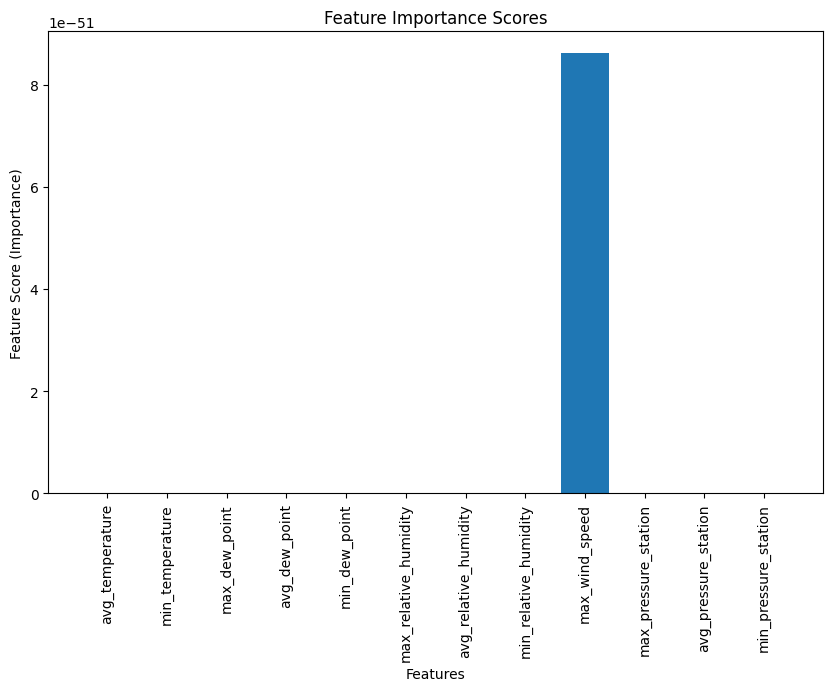

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming 'X' contains your feature data and 'y' contains the target variable

# Your code for feature selection (using SelectKBest)
selector = SelectKBest(f_regression, k=12)
X_new = selector.fit_transform(X, y)

mask = selector.get_support()
new_features = X.columns[mask]

# Retrieve the scores of selected features
feature_scores = selector.pvalues_

# Plotting the feature scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(new_features)), feature_scores[mask])
plt.xticks(range(len(new_features)), new_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Feature Score (Importance)')
plt.title('Feature Importance Scores')
plt.show()


<ipython-input-58-7463e95e206a>:15: RuntimeWarning:

divide by zero encountered in log10



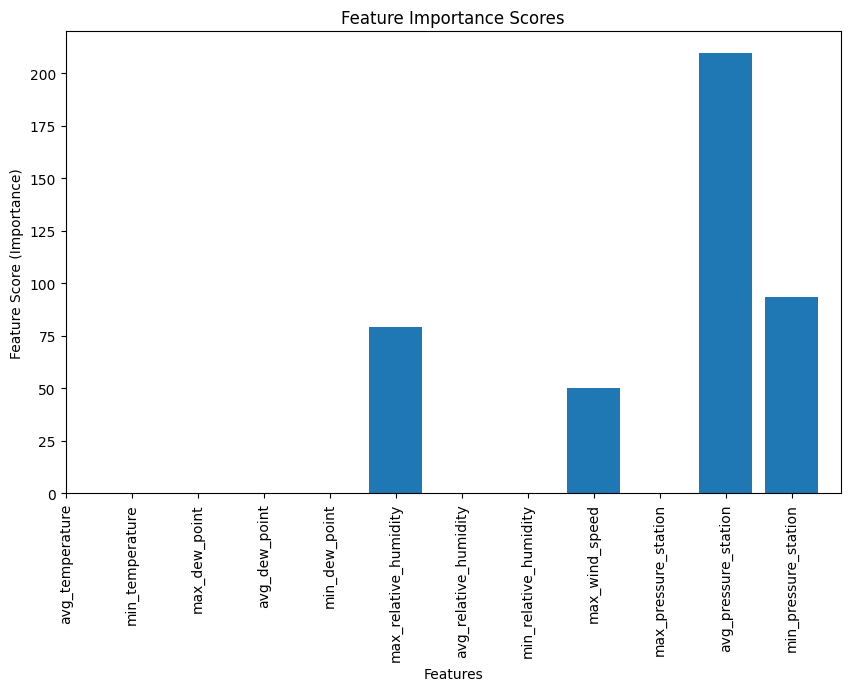

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming 'X' contains your feature data and 'y' contains the target variable

# Your code for feature selection (using SelectKBest)
selector = SelectKBest(f_regression, k=12)
X_new = selector.fit_transform(X, y)

mask = selector.get_support()
new_features = X.columns[mask]

# Retrieve the scores of selected features
feature_scores = -np.log10(selector.pvalues_)

# Plotting the feature scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(new_features)), feature_scores[mask])
plt.xticks(range(len(new_features)), new_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Feature Score (Importance)')
plt.title('Feature Importance Scores')
plt.show()


In [31]:
target = "max_temperature"

In [32]:
features = ['avg_temperature','min_temperature','max_dew_point','avg_dew_point','min_dew_point','max_relative_humidity','avg_relative_humidity','min_relative_humidity','max_wind_speed',
         'avg_wind_speed','min_wind_speed','max_pressure_station','avg_pressure_station','min_pressure_station']
features

['avg_temperature',
 'min_temperature',
 'max_dew_point',
 'avg_dew_point',
 'min_dew_point',
 'max_relative_humidity',
 'avg_relative_humidity',
 'min_relative_humidity',
 'max_wind_speed',
 'avg_wind_speed',
 'min_wind_speed',
 'max_pressure_station',
 'avg_pressure_station',
 'min_pressure_station']

In [33]:
df=df.dropna()

In [34]:
df

,max_temperature,avg_temperature,min_temperature,max_dew_point,avg_dew_point,min_dew_point,max_relative_humidity,avg_relative_humidity,min_relative_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,max_pressure_station,avg_pressure_station,min_pressure_station
0,-21.9,-26.60,-31.3,-25.0,-29.8,-34.5,78.0,73.5,69.0,29,17.0,5,96.38,95.61,94.85
1,-14.8,-20.39,-26.0,-18.8,-23.8,-28.8,86.0,79.0,72.0,23,13.0,3,95.49,95.02,94.55
2,-11.4,-13.15,-14.9,-13.5,-15.9,-18.4,86.0,78.0,70.0,31,18.0,5,95.42,94.77,94.13
3,-7.0,-10.30,-13.6,-8.7,-13.2,-17.6,88.0,80.0,72.0,25,13.0,1,95.43,94.99,94.54
4,-3.2,-7.60,-12.0,-6.8,-10.7,-14.6,89.0,79.5,70.0,28,15.0,2,95.20,94.86,94.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11005,-13.9,-22.25,-30.6,-16.7,-25.2,-33.7,82.0,72.5,63.0,22,11.0,0,96.85,96.38,95.91
11006,-16.6,-20.14,-23.7,-19.1,-22.4,-25.6,82.0,77.0,72.0,20,13.0,6,95.81,95.47,95.14
11007,-17.9,-22.60,-27.3,-20.9,-25.4,-29.9,82.0,76.0,70.0,22,14.0,6,95.20,94.97,94.75
11008,-18.5,-27.95,-37.4,-21.7,-31.0,-40.3,77.0,70.5,64.0,26,13.0,0,96.88,95.92,94.97


# _Data Pre-processing_

To process the data, we first split it into training and test data, where two-thirds of the data is used for training, and the last third is used for testing.

In [ ]:
size = int(len(df) * 0.67)

df_train = df.loc[:size].copy()
df_test = df.loc[size:].copy()

In [ ]:
df_test

,max_temperature,avg_temperature,min_temperature,max_dew_point,avg_dew_point,min_dew_point,max_relative_humidity,avg_relative_humidity,min_relative_humidity,max_wind_speed,avg_wind_speed,min_wind_speed,max_pressure_station,avg_pressure_station,min_pressure_station
7355,-1.4,-7.60,-13.8,-2.1,-8.2,-14.2,100.0,94.0,88.0,15,7.5,0,95.14,94.65,94.16
7356,-8.2,-14.35,-20.5,-8.2,-15.4,-22.7,100.0,89.0,78.0,26,15.0,4,95.72,95.47,95.21
7357,-11.0,-15.95,-20.9,-15.7,-18.6,-21.6,93.0,83.5,74.0,24,12.0,0,95.39,95.06,94.72
7358,-10.3,-17.05,-23.8,-12.3,-18.1,-23.9,97.0,85.5,74.0,32,16.0,0,95.24,94.79,94.35
7359,-6.8,-10.50,-14.2,-7.9,-11.3,-14.7,98.0,94.5,91.0,35,20.5,6,94.97,94.29,93.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11005,-13.9,-22.25,-30.6,-16.7,-25.2,-33.7,82.0,72.5,63.0,22,11.0,0,96.85,96.38,95.91
11006,-16.6,-20.14,-23.7,-19.1,-22.4,-25.6,82.0,77.0,72.0,20,13.0,6,95.81,95.47,95.14
11007,-17.9,-22.60,-27.3,-20.9,-25.4,-29.9,82.0,76.0,70.0,22,14.0,6,95.20,94.97,94.75
11008,-18.5,-27.95,-37.4,-21.7,-31.0,-40.3,77.0,70.5,64.0,26,13.0,0,96.88,95.92,94.97


Next, in order to ensure that some values due to their mangnitude do not inherently dominate the features, we standardize their values.

In [ ]:
target_mean = df_train[target].mean()
target_stdev = df_train[target].std()

for c in df_train.columns:
    mean = df_train[c].mean()
    stdev = df_train[c].std()

    df_train[c] = (df_train[c] - mean) / stdev
    df_test[c] = (df_test[c] - mean) / stdev

Finally, the last step in the data processing to prepare for LSTM is to prepare the data in a sequence of past observations. Preparation of the LSTM on time series data means that it uses a certain number of past observations to predict the future. In this case, the sequence length decides how many days the LSTM considers in advance. If the sequence length is $n$, then the LSTM considers the last $n$ observations to predict the $n+1$th day.

We decided the sequence length as 3 for purposes of this notebook.

In [ ]:
class SequenceDataset(Dataset):
    def __init__(self, dataframe, target, features, sequence_length=5):
        self.features = features
        self.target = target
        self.sequence_length = sequence_length
        self.y = torch.tensor(dataframe[self.target].values).float()
        self.X = torch.tensor(dataframe[self.features].values).float()

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, i):
        if i >= self.sequence_length - 1:
            i_start = i - self.sequence_length + 1
            x = self.X[i_start:(i + 1), :]
        else:
            padding = self.X[0].repeat(self.sequence_length - i - 1, 1)
            x = self.X[0:(i + 1), :]
            x = torch.cat((padding, x), 0)

        return x, self.y[i]

In [ ]:
torch.manual_seed(101)

batch_size = 1
sequence_length = 3

train_dataset = SequenceDataset(
    df_train,
    target=target,
    features=features,
    sequence_length=sequence_length
)
test_dataset = SequenceDataset(
    df_test,
    target=target,
    features=features,
    sequence_length=sequence_length
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: torch.Size([1, 3, 14])
Target shape: torch.Size([1])


# _Classical LSTM_

In [ ]:
def train_model(data_loader, model, loss_function, optimizer):
    num_batches = len(data_loader)
    total_loss = 0
    model.train()

    for X, y in data_loader:
        output = model(X)
        loss = loss_function(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / num_batches
    print(f"Train loss: {avg_loss}")
    return avg_loss

def test_model(data_loader, model, loss_function):

    num_batches = len(data_loader)
    total_loss = 0

    model.eval()
    with torch.no_grad():
        for X, y in data_loader:
            output = model(X)
            total_loss += loss_function(output, y).item()

    avg_loss = total_loss / num_batches
    print(f"Test loss: {avg_loss}")
    return avg_loss

In [ ]:
class LSTM(nn.Module):
    def __init__(self, num_sensors, hidden_units):
        super().__init__()
        self.num_sensors = num_sensors
        self.hidden_units = hidden_units
        self.num_layers = 1

        self.lstm = nn.LSTM(
            input_size=num_sensors,
            hidden_size=hidden_units,
            batch_first=True,
            num_layers=self.num_layers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()

        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn[0]).flatten()

        return out


In [ ]:
learning_rate = 0.0001
num_hidden_units = 16

model = LSTM(num_sensors=len(features), hidden_units=num_hidden_units)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
classical_loss_train = []
classical_loss_test = []
print("Training LSTM\n-------------------------------------------")
test_loss = test_model(test_loader, model, loss_function)
print()
classical_loss_test.append(test_loss)

for ix_epoch in range(20):
    print(f"Epoch {ix_epoch}\n*********************")
    train_loss = train_model(train_loader, model, loss_function, optimizer=optimizer)
    test_loss = test_model(test_loader, model, loss_function)
    print()
    classical_loss_train.append(train_loss)
    classical_loss_test.append(test_loss)

Training LSTM
-------------------------------------------
Test loss: 1.089485150274978

Epoch 0
*********************
Train loss: 0.17473678095790685
Test loss: 0.03182764663317767

Epoch 1
*********************
Train loss: 0.020234080314114958
Test loss: 0.019167843421233063

Epoch 2
*********************
Train loss: 0.013744670260277465
Test loss: 0.015287820818606801

Epoch 3
*********************
Train loss: 0.01081223316082424
Test loss: 0.01188521318426031

Epoch 4
*********************
Train loss: 0.008844531099681592
Test loss: 0.009826800329584393

Epoch 5
*********************
Train loss: 0.007440795915707123
Test loss: 0.008286082317911322

Epoch 6
*********************
Train loss: 0.006338161003941291
Test loss: 0.007346188736819479

Epoch 7
*********************
Train loss: 0.005408232367772152
Test loss: 0.006236021487806991

Epoch 8
*********************
Train loss: 0.004535050849418712
Test loss: 0.005007051850994326

Epoch 9
*********************
Train loss: 0.00373796

We then use the model to predict the test set, and then compare the results of the prediction to the real values.

In [ ]:
def predict(data_loader, model):
    output = torch.tensor([])
    model.eval()
    with torch.no_grad():
        for X, _ in data_loader:
            y_star = model(X)
            output = torch.cat((output, y_star), 0)

    return output

In [ ]:
train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

ystar_col = "Model forecast"
df_train[ystar_col] = predict(train_eval_loader, model).numpy()
df_test[ystar_col] = predict(test_loader, model).numpy()

df_out = pd.concat((df_train, df_test))[[target, ystar_col]]

for c in df_out.columns:
    df_out[c] = df_out[c] * target_stdev + target_mean

print(df_out)

       max_temperature  Model forecast
0                -21.9      -22.412373
1                -14.8      -15.510715
2                -11.4      -11.441067
3                 -7.0       -6.715269
4                 -3.2       -3.216184
...                ...             ...
11005            -13.9      -14.203959
11006            -16.6      -16.919212
11007            -17.9      -18.116938
11008            -18.5      -18.947227
11009            -35.3      -33.725624

[10979 rows x 2 columns]


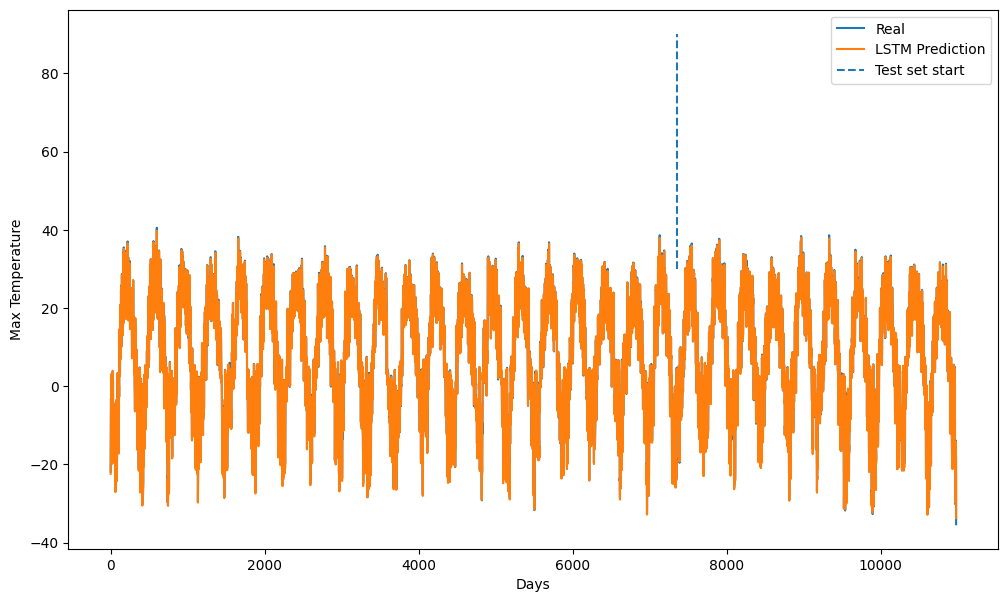

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(range(10979), df_out["max_temperature"], label = "Real")
plt.plot(range(10979), df_out["Model forecast"], label = "LSTM Prediction")
plt.ylabel('Max Temperature')
plt.xlabel('Days')
plt.vlines(size, ymin = 30, ymax = 90, label = "Test set start", linestyles = "dashed")
plt.legend()
plt.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(21)), y=classical_loss_test, mode='lines'))

fig.update_layout(title="Test Loss vs. Epoch",
                  xaxis_title="Epoch",
                  yaxis_title="Test Loss",
                  width=800,
                  height=600)

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1,21)), y=classical_loss_train, mode='lines'))

fig.update_layout(title="Train Loss vs. Epoch",
                  xaxis_title="Epoch",
                  yaxis_title="Train Loss",
                  width=800,
                  height=600)

fig.show()

# _Quantum LSTM_

![image.png](attachment:image.png)

Simply put, LSTM uses 4 neural network layers in each LSTM cell. They are:

- Forget layer
- Input layer
- Update layer
- Output layer

We can see the corresponding layers in the W cells in the picture above. We will be skipping the technical details, but it is important to note that these 4 layers are the keys to building an LSTM neural network model that we can train and eventually use to predict. They usually take the form of a normal NN layer (like a linear layer with reLU or convolutional layers).

LSTMs are well studied, and there is a native implementation of it in PyTorch to begin with, so we use a slightly modified version of it for the time series LSTM that we perform here. The code for the time series LSTM was reused from:

How to use PyTorch LSTMs for time series regression: https://www.crosstab.io/articles/time-series-pytorch-lstm, Brian Kent.

In the following code, we train LSTM to predict future stock prices, and then test it on the test dataset. The learning rate of 0.0001 was decided after some experimentation, where we chose the learning rate that gave accurate results. The number of epochs we use is 20, by which it would have converged and thus would suffice for the purposes of this notebook. After that, we visualize three different graphs: the comparison between the real stock prices and the ones given by the model; and the evolution of test loss and training loss by epoch.

To implement QLSTM, we then replace the 4 key layers of the LSTM with variational quantum layers enabled by Pennylane. The variational quantum layers are based on the following variational quantum circuits:

<img src="vqc.jpg" alt="drawing" width="600"/>


Thus, the parameters to be trained instead becomes the rotational parameters within the circuits, hence forming a hybrid quantum-classical neural network layer (as the optimizer is classical). In the paper on QLSTM, they show that the trainability of the QLSTM is better as "learns significantly more information than the LSTM does right after the first training epoch, and its loss decreases more stably and faster than that of its classical counterpart" (20). Thus, in this study, we hope to show that QLSTM has potential be more accurate and learn more per epoch than its classical counterpart.



In [ ]:
class QLSTM(nn.Module):
    def __init__(self,
                input_size,
                hidden_size,
                n_qubits=4,
                n_qlayers=1,
                n_vrotations=3,
                batch_first=True,
                return_sequences=False,
                return_state=False,
                backend="default.qubit"):
        super(QLSTM, self).__init__()
        self.n_inputs = input_size
        self.hidden_size = hidden_size
        self.concat_size = self.n_inputs + self.hidden_size
        self.n_qubits = n_qubits
        self.n_qlayers = n_qlayers
        self.n_vrotations = n_vrotations
        self.backend = backend

        self.batch_first = batch_first
        self.return_sequences = return_sequences
        self.return_state = return_state

        self.wires_forget = [f"wire_forget_{i}" for i in range(self.n_qubits)]
        self.wires_input = [f"wire_input_{i}" for i in range(self.n_qubits)]
        self.wires_update = [f"wire_update_{i}" for i in range(self.n_qubits)]
        self.wires_output = [f"wire_output_{i}" for i in range(self.n_qubits)]

        self.dev_forget = qml.device(self.backend, wires=self.wires_forget)
        self.dev_input = qml.device(self.backend, wires=self.wires_input)
        self.dev_update = qml.device(self.backend, wires=self.wires_update)
        self.dev_output = qml.device(self.backend, wires=self.wires_output)


        def ansatz(params, wires_type):
            for i in range(1,3):
                for j in range(self.n_qubits):
                    if j + i < self.n_qubits:
                        qml.CNOT(wires=[wires_type[j], wires_type[j + i]])
                    else:
                        qml.CNOT(wires=[wires_type[j], wires_type[j + i - self.n_qubits]])

            for i in range(self.n_qubits):
                qml.RX(params[0][i], wires=wires_type[i])
                qml.RY(params[1][i], wires=wires_type[i])
                qml.RZ(params[2][i], wires=wires_type[i])

        def VQC(features, weights, wires_type):
            ry_params = [torch.arctan(feature) for feature in features]
            rz_params = [torch.arctan(feature**2) for feature in features]
            for i in range(self.n_qubits):
                qml.Hadamard(wires=wires_type[i])
                qml.RY(ry_params[i], wires=wires_type[i])
                qml.RZ(ry_params[i], wires=wires_type[i])

            qml.layer(ansatz, self.n_qlayers, weights, wires_type = wires_type)

        def _circuit_forget(inputs, weights):
            VQC(inputs, weights, self.wires_forget)
            return [qml.expval(qml.PauliZ(wires=i)) for i in self.wires_forget]
        self.qlayer_forget = qml.QNode(_circuit_forget, self.dev_forget, interface="torch")

        def _circuit_input(inputs, weights):
            VQC(inputs, weights, self.wires_input)
            return [qml.expval(qml.PauliZ(wires=i)) for i in self.wires_input]
        self.qlayer_input = qml.QNode(_circuit_input, self.dev_input, interface="torch")

        def _circuit_update(inputs, weights):
            VQC(inputs, weights, self.wires_update)
            return [qml.expval(qml.PauliZ(wires=i)) for i in self.wires_update]
        self.qlayer_update = qml.QNode(_circuit_update, self.dev_update, interface="torch")

        def _circuit_output(inputs, weights):
            VQC(inputs, weights, self.wires_output)
            return [qml.expval(qml.PauliZ(wires=i)) for i in self.wires_output]
        self.qlayer_output = qml.QNode(_circuit_output, self.dev_output, interface="torch")

        weight_shapes = {"weights": (self.n_qlayers, self.n_vrotations, self.n_qubits)}
        print(f"weight_shapes = (n_qlayers, n_vrotations, n_qubits) = ({self.n_qlayers}, {self.n_vrotations}, {self.n_qubits})")

        self.clayer_in = torch.nn.Linear(self.concat_size, self.n_qubits)
        self.VQC = {
            'forget': qml.qnn.TorchLayer(self.qlayer_forget, weight_shapes),
            'input': qml.qnn.TorchLayer(self.qlayer_input, weight_shapes),
            'update': qml.qnn.TorchLayer(self.qlayer_update, weight_shapes),
            'output': qml.qnn.TorchLayer(self.qlayer_output, weight_shapes)
        }
        self.clayer_out = torch.nn.Linear(self.n_qubits, self.hidden_size)

    def forward(self, x, init_states=None):

        if self.batch_first is True:
            batch_size, seq_length, features_size = x.size()
        else:
            seq_length, batch_size, features_size = x.size()

        hidden_seq = []
        if init_states is None:
            h_t = torch.zeros(batch_size, self.hidden_size)
            c_t = torch.zeros(batch_size, self.hidden_size)
        else:
            h_t, c_t = init_states
            h_t = h_t[0]
            c_t = c_t[0]

        for t in range(seq_length):
            x_t = x[:, t, :]

            v_t = torch.cat((h_t, x_t), dim=1)

            y_t = self.clayer_in(v_t)

            f_t = torch.sigmoid(self.clayer_out(self.VQC['forget'](y_t)))
            i_t = torch.sigmoid(self.clayer_out(self.VQC['input'](y_t)))
            g_t = torch.tanh(self.clayer_out(self.VQC['update'](y_t)))
            o_t = torch.sigmoid(self.clayer_out(self.VQC['output'](y_t)))

            c_t = (f_t * c_t) + (i_t * g_t)
            h_t = o_t * torch.tanh(c_t)

            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        return hidden_seq, (h_t, c_t)

class QuantumLSTM(nn.Module):
    def __init__(self, num_sensors, hidden_units, n_qubits=0, n_qlayers=1):
        super().__init__()
        self.num_sensors = num_sensors
        self.hidden_units = hidden_units
        self.num_layers = 1
        self.lstm = QLSTM(
            input_size=num_sensors,
            hidden_size=hidden_units,
            batch_first=True,
            n_qubits = n_qubits,
            n_qlayers= n_qlayers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()

        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn).flatten()

        return out

In [ ]:
learning_rate = 0.05
num_hidden_units = 16

Qmodel = QuantumLSTM(num_sensors=len(features), hidden_units=num_hidden_units, n_qubits=4)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adagrad(Qmodel.parameters(), lr=learning_rate)

weight_shapes = (n_qlayers, n_vrotations, n_qubits) = (1, 3, 4)


In [ ]:
quantum_loss_train = []
quantum_loss_test = []
print("Training QLSTM\n-------------------------------------------")
start = time.time()
test_loss = test_model(test_loader, Qmodel, loss_function)
end = time.time()
print("Execution time", end - start)
quantum_loss_test.append(test_loss)

for ix_epoch in range(10):
    print(f"Epoch {ix_epoch}\n*********************")
    start = time.time()
    train_loss = train_model(train_loader, Qmodel, loss_function, optimizer=optimizer)
    test_loss = test_model(test_loader, Qmodel, loss_function)
    end = time.time()
    print("Execution time", end - start)
    quantum_loss_train.append(train_loss)
    quantum_loss_test.append(test_loss)

Training QLSTM
-------------------------------------------
Test loss: 0.00972359746492038
Execution time 678.3818390369415
Epoch 0
*********************
Train loss: 0.005508107144926905
Test loss: 0.004312073253816142
Execution time 2774.8312816619873
Epoch 1
*********************
Train loss: 0.002673120998157186
Test loss: 0.0021211768291725837
Execution time 2782.9651889801025
Epoch 2
*********************
Train loss: 0.001428010528405749
Test loss: 0.0011842672346522348
Execution time 2933.4039714336395
Epoch 3
*********************
Train loss: 0.0009381389409002592
Test loss: 0.0009536534114653226
Execution time 2921.830075263977
Epoch 4
*********************
Train loss: 0.0007555192225293476
Test loss: 0.0007681777461665115
Execution time 3232.9608838558197
Epoch 5
*********************
Train loss: 0.0006496145380010825
Test loss: 0.0006387388804432212
Execution time 2840.653478860855
Epoch 6
*********************
Train loss: 0.000591434314850243
Test loss: 0.0016372983085711323
E

In [ ]:
torch.save(Qmodel.state_dict(), 'qlstm.pth')


In [ ]:
QLoadedModel = QuantumLSTM(num_sensors=len(features), hidden_units=num_hidden_units, n_qubits=4)
QLoadedModel.load_state_dict(torch.load('qlstm.pth'))

weight_shapes = (n_qlayers, n_vrotations, n_qubits) = (1, 3, 4)


<All keys matched successfully>

In [ ]:
#loaded
train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

ystar_col_Q = "Model forecast"
df_train[ystar_col_Q] = predict(train_eval_loader, QLoadedModel).numpy()
df_test[ystar_col_Q] = predict(test_loader, QLoadedModel).numpy()

df_out_Q = pd.concat((df_train, df_test))[[target, ystar_col_Q]]

for c in df_out_Q.columns:
    df_out_Q[c] = df_out_Q[c] * target_stdev + target_mean

print(df_out_Q)

       max_temperature  Model forecast
0                -21.9       15.802029
1                -14.8       14.996199
2                -11.4       13.311269
3                 -7.0       11.896161
4                 -3.2       10.521304
...                ...             ...
11005            -13.9       13.901391
11006            -16.6       14.161253
11007            -17.9       14.661882
11008            -18.5       15.371006
11009            -35.3       16.609741

[10979 rows x 2 columns]


In [ ]:
train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

ystar_col_Q = "Model forecast"
df_train[ystar_col_Q] = predict(train_eval_loader, Qmodel).numpy()
df_test[ystar_col_Q] = predict(test_loader, Qmodel).numpy()

df_out_Q = pd.concat((df_train, df_test))[[target, ystar_col_Q]]

for c in df_out_Q.columns:
    df_out_Q[c] = df_out_Q[c] * target_stdev + target_mean

print(df_out_Q)

       max_temperature  Model forecast
0                -21.9      -21.891123
1                -14.8      -15.285730
2                -11.4      -11.745960
3                 -7.0       -7.023180
4                 -3.2       -3.201739
...                ...             ...
11005            -13.9      -14.353682
11006            -16.6      -16.527956
11007            -17.9      -17.818203
11008            -18.5      -18.555122
11009            -35.3      -30.313805

[10979 rows x 2 columns]


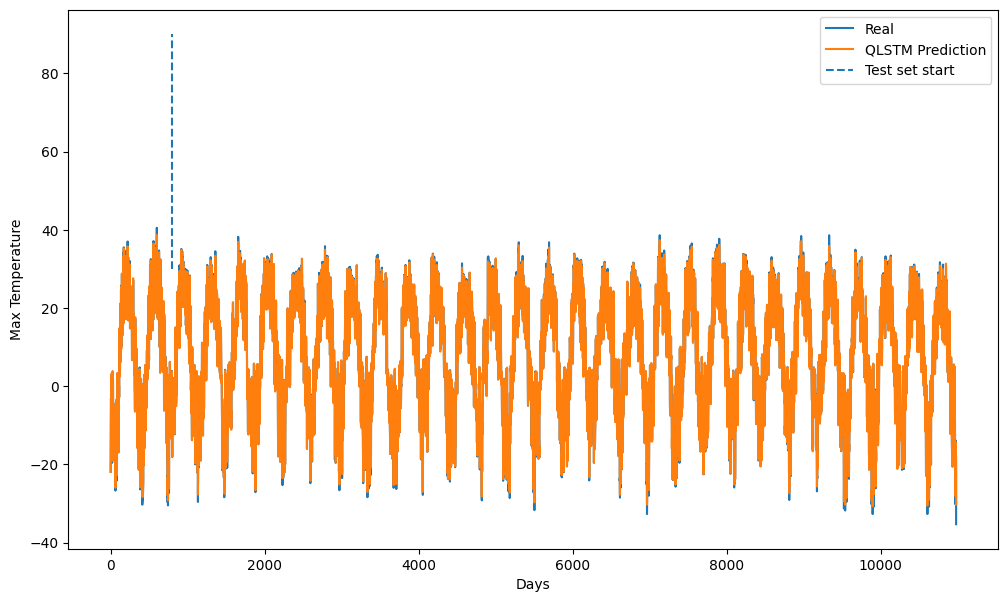

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(range(10979), df_out_Q["max_temperature"], label = "Real")
plt.plot(range(10979), df_out_Q["Model forecast"], label = "QLSTM Prediction")
plt.ylabel('Max Temperature')
plt.xlabel('Days')
plt.vlines(size, ymin = 30, ymax = 90, label = "Test set start", linestyles = "dashed")
plt.legend()
plt.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(10979)), y=df_out_Q["max_temperature"], mode='lines', name='Real'))
fig.add_trace(go.Scatter(x=list(range(10979)), y=df_out_Q["Model forecast"], mode='lines', name='QLSTM Prediction'))
size = 800
fig.add_shape(dict(type='line', x0=size, y0=30, x1=size, y1=90,line=dict(color='black', width=2, dash='dash')))
fig.update_layout(title="Max Temperature",xaxis_title="Days",yaxis_title="Max Temperature",width=1200,height=700)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(21)), y=quantum_loss_test, mode='lines'))

fig.update_layout(title="Test Loss vs. Epoch",
                  xaxis_title="Epoch",
                  yaxis_title="Test Loss",
                  width=800,
                  height=600)

fig.show()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1,21)), y=quantum_loss_train, mode='lines'))

fig.update_layout(title="Train Loss vs. Epoch",
                  xaxis_title="Epoch",
                  yaxis_title="Train Loss",
                  width=800,
                  height=600)

fig.show()


# Classical LSTM VS QLSTM

# _Prediction Line Chart_

In [ ]:
real_trace = go.Scatter(x=list(range(10979)), y=df_out["max_temperature"], name='Real')
lstm_trace = go.Scatter(x=list(range(10979)), y=df_out["Model forecast"], name='LSTM')
qlstm_trace = go.Scatter(x=list(range(10979)), y=df_out_Q["Model forecast"], name='QLSTM')
test_set_start_line = go.Scatter(x=[size, size], y=[30, 90], mode='lines', name='Test set start', line=dict(dash='dash'))
data = [real_trace, lstm_trace, qlstm_trace, test_set_start_line]
layout = go.Layout(title='Max Temperature vs Days', xaxis_title='Days', yaxis_title='Max Temperature', width=1200, height=700)
fig = go.Figure(data=data, layout=layout)
fig.show()

#### Based on the graph, it is clear that the LSTM and QLSTM models perform similarly albiet the QLSTM converges to a minima faster when compared to the LSTM which was the crux of our study. They are able to accurately predict the training set of about 6000 datapoints and provide highly accurate forecasts for a significant period after the test set begins, before gradually but slightly diverging from the actual values.

# _Loss Calculation_

In [ ]:
classical_trace = go.Scatter(x=list(range(1, 21)), y=classical_loss_train, name='LSTM')
quantum_trace = go.Scatter(x=list(range(1, 11)), y=quantum_loss_train, name='QLSTM')
data = [classical_trace, quantum_trace]
layout = go.Layout(title='Train Loss vs Epoch', xaxis_title='Epoch', yaxis_title='Train Loss')
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
classical_trace = go.Scatter(x=list(range(1, 21)), y=classical_loss_test, name='LSTM')
quantum_trace = go.Scatter(x=list(range(1, 11)), y=quantum_loss_test, name='QLSTM')
data = [classical_trace, quantum_trace]
layout = go.Layout(title='Test Loss vs Epoch', xaxis_title='Epoch', yaxis_title='Test Loss')
fig = go.Figure(data=data, layout=layout)
fig.show()

# _Trainable Parameters_

An advantage that I have mentioned early on is that Quantum neural networks typically use a smaller number of parameters compared to classical neural networks due to the nature of the quantum computation. In a classical neural network, each neuron performs a weighted sum of its inputs followed by an activation function, and the weights associated with each neuron are optimized during training. This requires a large number of parameters to be learned, making the model more complex and computationally expensive.

In contrast, quantum neural networks use quantum gates, which operate on a small number of qubits at a time. These quantum gates can be composed to perform more complex computations, but the number of parameters that need to be learned is typically much smaller than in classical neural networks. This is because the quantum gates operate on a smaller number of qubits, and the number of possible unitary transformations that can be applied to those qubits is limited.

In addition, quantum neural networks often use techniques such as data re-uploading, which allow the same set of parameters to be reused across multiple layers of the network. This reduces the number of parameters that need to be learned and can lead to more efficient training. Pytorch makes it extremely convenient to fetch the parameters that were used in training our network.

In [ ]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
total_params_Q = sum(p.numel() for p in Qmodel.parameters() if p.requires_grad)

print("Number of parameters for Classical LSTM: ", total_params)
print("Number of parameters for QLSTM: ", total_params_Q)

Number of parameters for Classical LSTM:  2065
Number of parameters for QLSTM:  221


# _Conclusion_

It is evident that QLSTM learns significantly more information during the initial epochs compared to LSTM, leading to a much faster convergence to an acceptable loss value. This improved trainability of the quantum model is a noteworthy advantage over its classical counterpart. Eventually, both models converge to a low loss value, but the QLSTM does so in a shorter amount of time due to its ability to quickly assimilate information. This project has demonstrated that QLSTM can be a promising approach for time-series prediction, specifically weather forecasting, yielding results comparable to classical LSTM models while requiring fewer parameters for training and achieving greater information gain per epoch. However, there is still room for further improvement in this technique, specifically the need for a real quantum system with a powerful processing power capable of handling more epochs would converge to a better trained model with proprietry quantum computation instead of the pennylane simulation that is being used currently to showcase the potential of a _**QLSTM For Time Series Prediction**_